In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Exercise 1
The dataset blood pressure.csv is a dataset recording blood pressure befure and after a
given surgery. These informations are stored in the two variables bp before and bp after.

Import the data

In [106]:
blood_pressure = pd.read_csv('blood_pressure.csv')

In [107]:
blood_pressure

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


<AxesSubplot:>

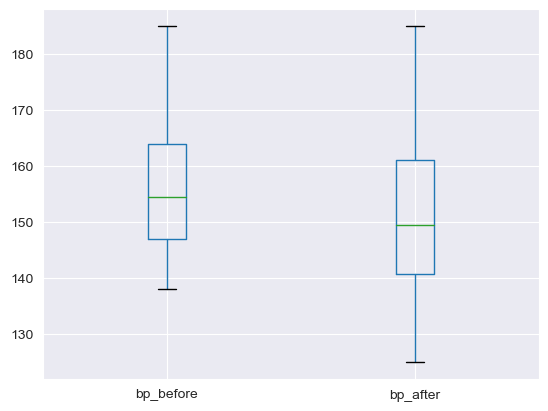

In [108]:
blood_pressure[['bp_before','bp_after']].boxplot()

As can beseen from the graph, the median blood-presure before surgery is around 155 and after surgery is 150. The median is closer to the bottom of the box, and if the whisker is shorter on the lower end of the box, then the distribution is positively skewed (skewed right), so it not a normal distribution. Before surgery the data is reange from 140 to over 180 but after it, it range from below 130 to the same level of before surgery. After the surgery, the data is more spread than before surgery.

(array([ 3.,  9., 12.,  7., 10., 11.,  8.,  4., 12.,  4.,  9.,  6.,  4.,
         5.,  7.,  3.,  1.,  1.,  0.,  4.]),
 array([138.  , 140.35, 142.7 , 145.05, 147.4 , 149.75, 152.1 , 154.45,
        156.8 , 159.15, 161.5 , 163.85, 166.2 , 168.55, 170.9 , 173.25,
        175.6 , 177.95, 180.3 , 182.65, 185.  ]),
 <BarContainer object of 20 artists>)

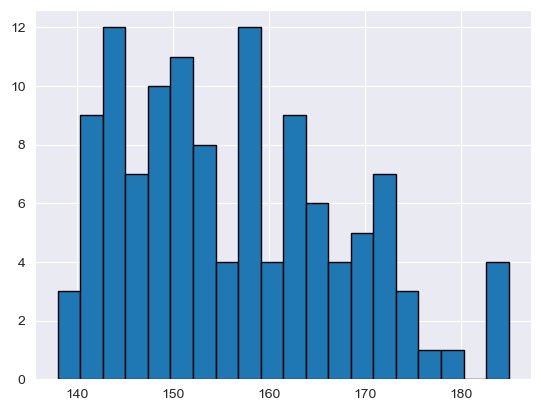

In [109]:
plt.hist(blood_pressure['bp_before'], edgecolor='black', bins=20)

(array([ 3.,  0.,  8., 11.,  6.,  8.,  7., 13., 10.,  9.,  4., 10.,  7.,
         3.,  8.,  2.,  4.,  3.,  0.,  4.]),
 array([125., 128., 131., 134., 137., 140., 143., 146., 149., 152., 155.,
        158., 161., 164., 167., 170., 173., 176., 179., 182., 185.]),
 <BarContainer object of 20 artists>)

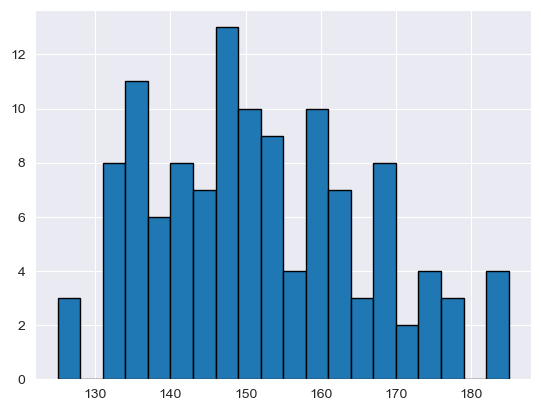

In [110]:
plt.hist(blood_pressure['bp_after'], edgecolor='black', bins=20)

Perform a Kolmogorov-Smirnov Test

In [111]:
from scipy.stats._morestats import ShapiroResult
from scipy.stats import shapiro

#perform Shapiro-Wilk test for normality
shapiro(blood_pressure['bp_before'])

ShapiroResult(statistic=0.9547789096832275, pvalue=0.0004928590497002006)

In [112]:
#perform Shapiro-Wilk test for normality
shapiro(blood_pressure['bp_after'])

ShapiroResult(statistic=0.974064290523529, pvalue=0.02022933028638363)

From the output we can see that the test statistic is 0.954 ND 0.974 respectively and the corresponding p-value is 0.0004 and 0.02.

Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.

This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

Create a Q-Q plot

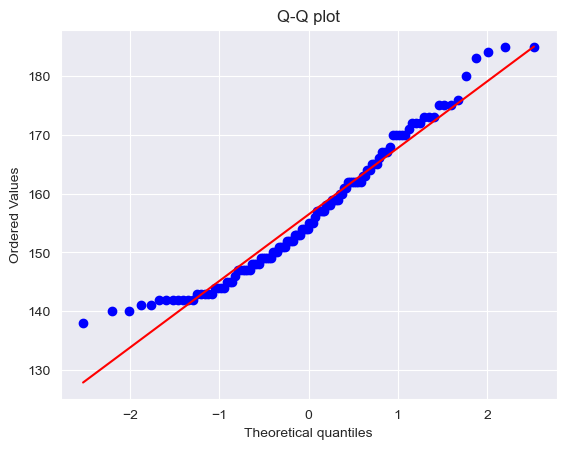

In [113]:
import scipy.stats as stats
stats.probplot(blood_pressure['bp_before'], plot=plt)
plt.title("Q-Q plot")
plt.show()

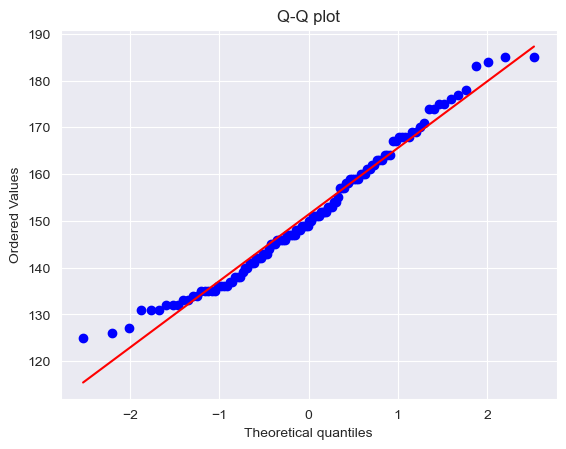

In [114]:
import scipy.stats as stats
stats.probplot(blood_pressure['bp_after'], plot=plt)
plt.title("Q-Q plot")
plt.show()

In [115]:
import scipy.stats as stats
stats.ttest_rel(blood_pressure['bp_before'], blood_pressure['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

As the p-value comes out to be equal to 0.0011 which is less than 0.05 hence we reject the null hypothesis. So, we have enough proof to claim that there is a different before and after surgery .

In a two-sample test, we have two independent samples. Of course, by independence, we expect the two sets of measurements will not be correlated. Sample sizes for the two samples need not be equal. (But it often makes sense for them to be approximately equal.)

A paired t-test is used to compare a single population before and after some experimental intervention or at two different points in time (for example, measuring student performance on a test before and after being taught the material).
I am using the paired t-test and not a two sample one because it is the data before and after. It is the one population, so it not idenpendant from each-other.

Exercise 2
A Non Gouvernemntal Organization is planning on launching a training program designed
to boost incomes. Based on their experiences in running pilot programs in other countries,
they have found that older, richer men tend to self-select into the training program. They
have collected the data village.csv to assess the effect of the program on participant
incomes

In [116]:
df = pd.read_csv('village.csv')

In [117]:
df

,id,sex,age,pre_income,program,post_income,sex_num,program_num
0,1,Male,45,979.407453,No program,1281.490982,1,0
1,2,Female,23,663.545110,No program,1041.346836,0,0
2,3,Female,42,729.256002,No program,1247.336819,0,0
3,4,Female,34,744.371565,Program,1248.704147,0,1
4,5,Female,53,768.991891,No program,1342.932254,0,0
...,...,...,...,...,...,...,...,...
995,996,Male,35,637.734280,No program,1195.449627,1,0
996,997,Female,50,845.625777,Program,1426.746177,0,1
997,998,Male,41,818.407329,No program,1246.869065,1,0
998,999,Female,53,805.797636,No program,1349.237168,0,0


We now separate the data into two groups

In [118]:
df_np=df[df['program']=='No program']
df_p=df[df['program']=='Program']

3. Using the command boxplot of the library seaborn vizualize the distribution of
the variable age in these two dataframes. Comment the boxplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


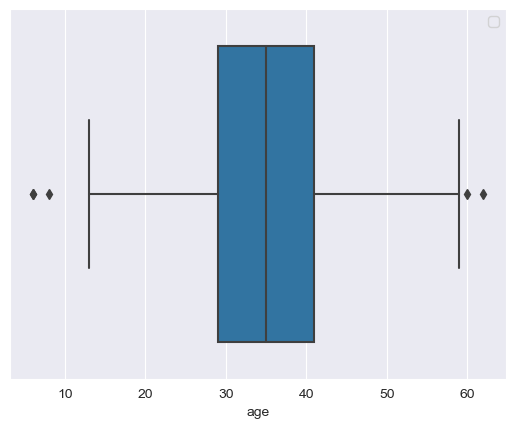

In [119]:
sns.boxplot(x=df_np["age"])
plt.legend()
plt.show()

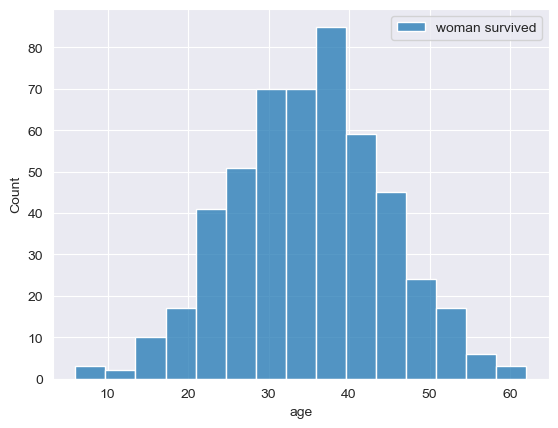

In [120]:
sns.histplot(df_np.age.dropna(), bins=15, label='woman survived')
plt.legend()
plt.show()

By simply looking at this histogram, we can tell the dataset does exhibit a “bell-shape” and is normally distributed.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


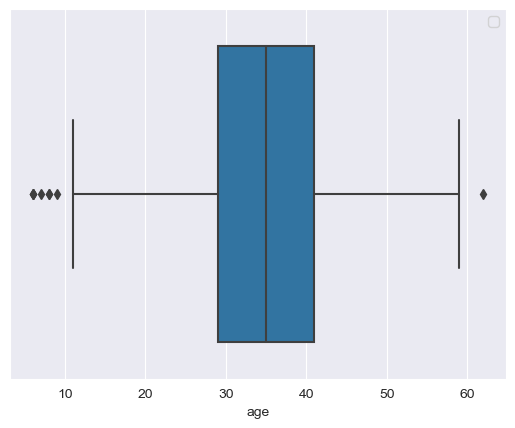

In [121]:
sns.boxplot(x=df_p["age"])
plt.legend()
plt.show()

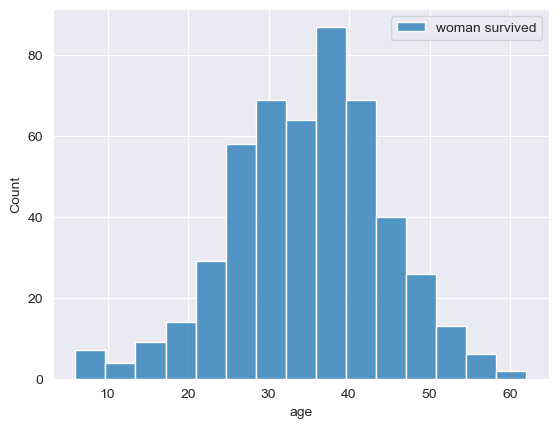

In [122]:
sns.histplot(df_p.age.dropna(), bins=15, label='woman survived')
plt.legend()
plt.show()

By simply looking at this histogram, we can tell the dataset does exhibit a “bell-shape” and is normally distributed.

4. Using the command boxplot of the library seaborn vizualize the distribution of
the variable pre income in these two dataframes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


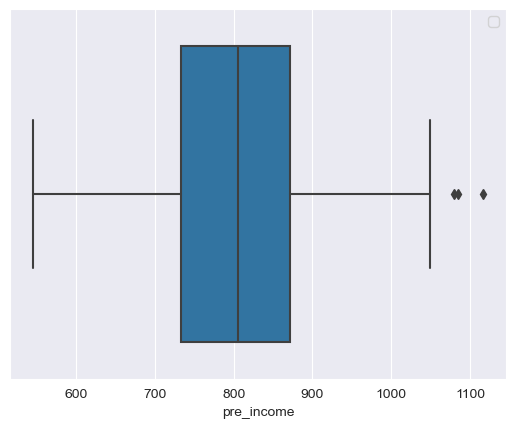

In [123]:
sns.boxplot(x=df_np["pre_income"])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


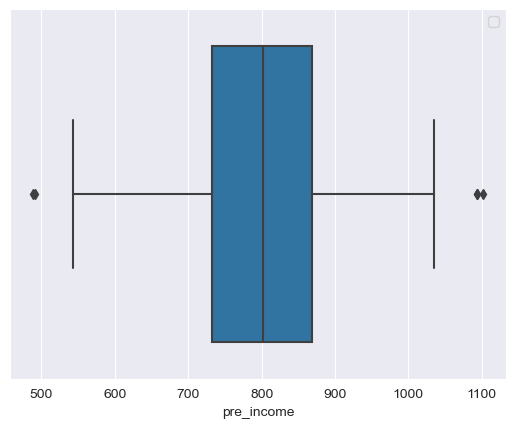

In [124]:
sns.boxplot(x=df_p["pre_income"])
plt.legend()
plt.show()

5. We now want to check that there are not any statistically significant differences between the group. Perform a Kolmogorov Smirnov test using the command ks 2samp to compare the distribution of the variable sex num (gender proportion) in the two
dataframes. The risk level is set to α = 0.05

In [125]:
from scipy.stats import ks_2samp

test_stat = ks_2samp(df_p["sex_num"], df_np["sex_num"])
test_stat

KstestResult(statistic=0.01912868863279078, pvalue=0.9999632304521416)

The p-value of 0.999 is not below our threshold of 0.05, so we cannot reject the null hypothesis that they have the same distribution. We can not reject the null hypothesis that there are not any statistically significant differences between the group

Exercise 3
We shall illustrate PCA on the hand written digit dataset

In [126]:
import sklearn
from sklearn.datasets import load_digits
digits = load_digits()

In [127]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [128]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [129]:
# visualize digits data
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

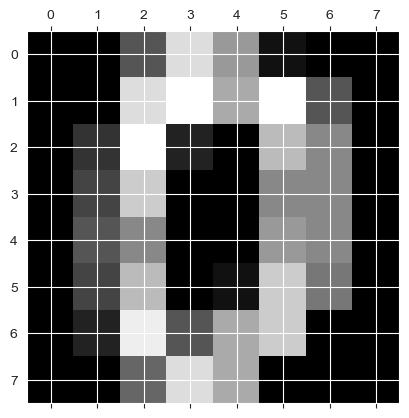

In [130]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(digits.data[0].reshape(8,8))

In [131]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [132]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [133]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df)
x

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [134]:
from sklearn.model_selection import train_test_split
train_X, validation_X, train_Y, validation_Y = train_test_split(x, digits.target, test_size=0.2)
train_X

array([[ 0.        , -0.33501649, -0.25345218, ..., -0.63808502,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.20951905,
         2.91780729,  3.56823458],
       [ 0.        , -0.33501649, -1.09493684, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       ...,
       [ 0.        , -0.33501649,  0.79840364, ...,  0.20951905,
        -0.26113572, -0.19600752],
       [ 0.        , -0.33501649, -0.46382335, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.25345218, ..., -0.29904339,
        -0.5056698 , -0.19600752]])

In [135]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_Y)
model.score(validation_X, validation_Y)

0.9694444444444444

In [136]:
from sklearn.decomposition import PCA
pca = PCA(0.95) # Retain 95% of useful feature and create new dimension
x_pca = pca.fit_transform(x)
x_pca.shape

(1797, 40)

In [137]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 , 0.01271931, 0.01165837, 0.01057647, 0.00975316,
       0.00944559, 0.00863014, 0.00836643, 0.00797693, 0.00746471,
       0.00725582, 0.00691911, 0.00653909, 0.00640793, 0.00591384,
       0.00571162, 0.00523637, 0.00481808, 0.00453719, 0.00423163])

In [138]:
pca.n_components_

40

In [139]:
from sklearn.model_selection import train_test_split
train_X, validation_X, train_Y, validation_Y = train_test_split(x_pca, digits.target, test_size=0.2)
train_X.shape

(1437, 40)

In [140]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_Y)
model.score(validation_X, validation_Y)

0.9666666666666667

In [141]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca.shape

(1797, 2)

In [142]:
from sklearn.model_selection import train_test_split
train_X, validation_X, train_Y, validation_Y = train_test_split(x_pca, digits.target, test_size=0.2)
train_X.shape

(1437, 2)

In [143]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_Y)
model.score(validation_X, validation_Y)

0.5222222222222223